In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
data_path_without = "Data/Data_raw_01082024/withoutWaterArea.csv"
data_path_with = "Data/Data_raw_01082024/withWaterArea.csv"

In [144]:
import DataLoader, Machine_Model, Engine
import torch, matplotlib.pyplot as plt

sequence = 2
train_percent = 0.8
val_percent = 0.1
random_state = 42
batch_size = 1

dataloader = DataLoader.AOV_Dataloader(file_path=data_path_with, sequence=sequence, train_percent=train_percent,
                                       val_percent=val_percent, random_state=random_state, batch_size=batch_size)
train, val, test = dataloader.fit()

# print(len(train), len(val), len(test))

INPUT_SIZE = len(train.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 128
NUM_LAYERS = 4
OUTPUT_SIZE = 1
EPOCHS = 500
model_name = f"AOV_predict_RNN_V0"

model0 = Machine_Model.AOV_Prediction_Time_Series(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS,
                                                  layer_number=NUM_LAYERS, output_size=OUTPUT_SIZE)

loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)

engine = Engine.Machine_Engine(model=model0, train_dataloader=train, val_dataloader=val, test_dataloader=test)
model0_results = engine.train(model_name=model_name, loss_fn=loss_fn, optimizer=optimizer, epochs_num=EPOCHS,
                              early_stop_patience=15)


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.079011 Accuracy 0.0000 | validation: Loss 0.066851 Accuracy 0.0000
Epoch 1 | train: Loss 0.070446 Accuracy 0.0000 | validation: Loss 0.055240 Accuracy 0.0000
Epoch 2 | train: Loss 0.063004 Accuracy 0.0000 | validation: Loss 0.048768 Accuracy 0.0000
Epoch 3 | train: Loss 0.055486 Accuracy 0.0000 | validation: Loss 0.042748 Accuracy 0.0000
Epoch 4 | train: Loss 0.047702 Accuracy 0.0000 | validation: Loss 0.040470 Accuracy 0.0000
Epoch 5 | train: Loss 0.041264 Accuracy 0.0000 | validation: Loss 0.038876 Accuracy 0.0000
Epoch 6 | train: Loss 0.036100 Accuracy 0.0000 | validation: Loss 0.035566 Accuracy 0.0000
Epoch 7 | train: Loss 0.031984 Accuracy 0.0000 | validation: Loss 0.032439 Accuracy 0.0000
Epoch 8 | train: Loss 0.029044 Accuracy 0.0000 | validation: Loss 0.030509 Accuracy 0.0000
Epoch 9 | train: Loss 0.027055 Accuracy 0.0000 | validation: Loss 0.029429 Accuracy 0.0000
Epoch 10 | train: Loss 0.025636 Accuracy 0.0000 | validation: Loss 0.028752 Accuracy 0.000

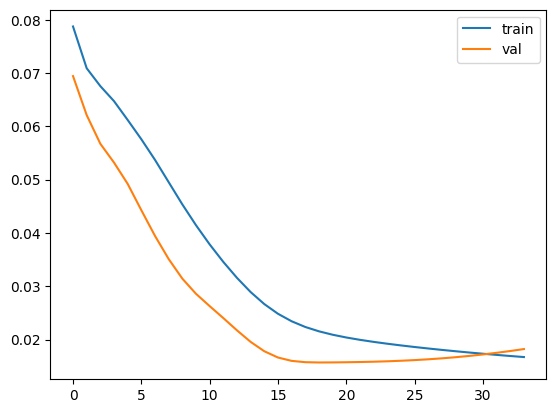

In [106]:
plt.plot(range(len(model0_results["train_loss"])), model0_results["train_loss"], label="train")
plt.plot(range(len(model0_results["val_loss"])), model0_results["val_loss"], label="val")
plt.legend()
plt.show()

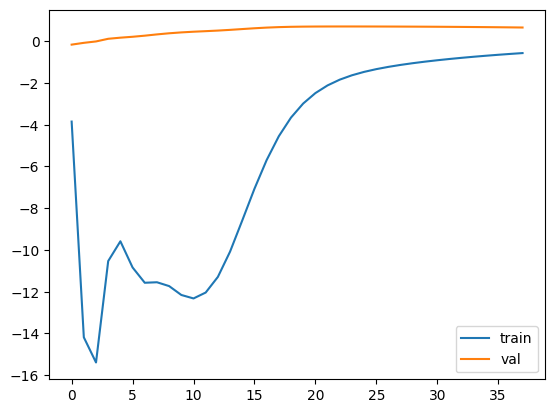

In [104]:
plt.plot(range(len(model0_results["train_acc"])), model0_results["train_acc"], label="train")
plt.plot(range(len(model0_results["val_acc"])), model0_results["val_acc"], label="val")
plt.legend()
plt.show()